In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/archive/data.csv")
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
df['Critic_Score'].mean()

7.21370869033052

# Data Cleaning

<b> Select relevant columns

In [4]:
df.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [5]:
games = df[['basename','Genre','ESRB_Rating','Platform','Publisher','Developer','Year','Global_Sales']]

In [6]:
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
0,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,2006.0,NaN
1,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,1985.0,NaN
2,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,2008.0,NaN
3,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,2017.0,NaN
4,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,2009.0,NaN


<b> Drop entries without sales result

In [7]:
games = games[games['Global_Sales'].notna()]
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09


In [8]:
games

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,NaN,DS,505 Games,Crush Digital,2010.0,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007.0,0.00
21239,shinobido-tales-of-the-ninja,Action,NaN,PSP,Sony Computer Entertainment,Acquire,2007.0,0.00
21240,tactical-ops-assault-on-terror,Shooter,NaN,PC,Atari,Kamehan Studios,2002.0,0.00


<b> Check genre column

In [9]:
# Genre column looks okay
print(games['Genre'].unique())
print(games['Genre'].isna().sum())

['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Misc' 'Role-Playing'
 'Simulation' 'Platform' 'Racing' 'Music' 'Fighting' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Board Game' 'Visual Novel'
 'Education']
0


Make a quick bar chart to examine the distribution

<AxesSubplot:>

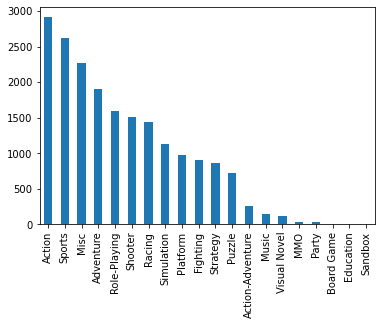

In [10]:
games['Genre'].value_counts().plot.bar()

<b> Now let's check out the ESRB_Rating column

In [11]:
games['ESRB_Rating'].unique()

array(['M', 'E', 'E10', 'T', nan, 'RP', 'EC'], dtype=object)

In [12]:
games['ESRB_Rating'].value_counts()

E      5883
T      3953
M      2059
E10    1844
RP       44
EC       27
Name: ESRB_Rating, dtype: int64

About 29% of our entries dont have an ESRB rating.  There is a rating called RP which means rating pending which we could use, or we could create an entirely separate value for our unknown ratings.  I think I shall group them as 'Unknown'

In [13]:
games['ESRB_Rating'].isna().mean()

0.28869430852433686

In [14]:
games["ESRB_Rating"] = games['ESRB_Rating'].fillna('Unknown')

In [15]:
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09


<b> Let's check the platform column

In [16]:
print(games["Platform"].unique())

['PS3' 'PS4' 'PS2' 'X360' 'Wii' 'XOne' 'PC' 'PSP' 'PS' 'DS' 'NS' '2600'
 'GBA' 'NES' 'XB' '3DS' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'GB' 'SNES' 'SAT'
 'GBC' 'GC' 'SCD' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'PCFX' 'Mob']


In [17]:
games['Platform'].isna().mean()

0.0

<AxesSubplot:>

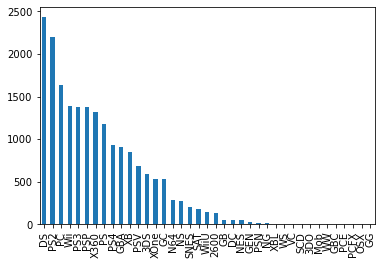

In [18]:
games['Platform'].value_counts().plot.bar()

In [19]:
games[games['Platform'] == '3DO']

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
12820,super-street-fighter-ii-turbo,Fighting,Unknown,3DO,Panasonic Interactive Media,Capcom,1994.0,0.09
14609,policenauts,Adventure,Unknown,3DO,Konami,Konami,1995.0,0.06
17342,bust-a-move,Puzzle,E,3DO,Panasonic Interactive Media,Taito Corporation,1995.0,0.02
17918,sotsugyou-ii-neo-generation-special,Simulation,Unknown,3DO,Imageworks,Shar Rock,1995.0,0.02


There are quite a few platforms with only a few entries, we could group them into a platform called 'other' but I think it will be okay to leave it as is

<b> Now let's check out the Publisher Columns

In [20]:
games['Publisher'].nunique()

744

In [21]:
games['Publisher'].isna().mean()

0.0

In [22]:
games['Publisher'].value_counts()

Activision                  1051
Ubisoft                     1021
Electronic Arts              859
Konami                       789
THQ                          739
                            ... 
H2 Interactive Co., Ltd.       1
Elephant Entertainment         1
Kamui                          1
Tequila Works                  1
Gremlin Interactive Ltd        1
Name: Publisher, Length: 744, dtype: int64

Publisher column also looks okay

<b> Check Developer Column

In [23]:
games['Developer'].isna().mean()

0.00020602626834921454

There are a small number of entries where developer is null

In [24]:
games[games['Developer'].isna()]

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
10839,gourmet-chef-cook-your-way-to-fame,Misc,E,DS,Ubisoft,NaN,2008.0,0.14
12704,wordmaster,Strategy,E,DS,"Destination Software, Inc",NaN,2008.0,0.09
20694,sas-secure-tomorrow,Shooter,Unknown,PC,City Interactive,NaN,2008.0,0.00
21227,my-baby-and-me,Misc,E,Wii,Unknown,NaN,NaN,0.00


I checked these games online for their developers, and it seems that the developer is the same as the publisher, so I will naturally set them equal

In [25]:
def fill_developer(row):
    if row['Developer'] is np.nan:
        row['Developer'] = row['Publisher']
    return row

In [26]:
games = games.apply(fill_developer,axis=1)
games['Developer'].isna().mean()

0.0

<b> Check Year Column

In [27]:
games['Year'].unique()

array([2013., 2014., 2002., 2015., 2011., 2010., 2018., 2012., 2009.,
       2017., 2001., 2008., 2016., 2007., 2005., 1997., 2003., 1998.,
       2004., 1999., 1996., 2006., 2000., 1982., 1981., 1989., 1994.,
       1995., 1993., 1990., 1978., 1988., 1983., 1986., 1992., 1977.,
       1987., 1991., 1985., 2019., 2020., 1984., 1980., 1970., 1979.,
         nan])

In [28]:
games['Year'].isna().mean()

0.001957249549317538

In [29]:
games[games['Year'].isna()]

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
15224,tour-de-france-2011,Sports,E,X360,Unknown,Cyanide Studio,NaN,0.05
15653,the-history-channel-great-battles-medieval,Strategy,Unknown,PS3,Unknown,Slitherine Software,NaN,0.04
15791,blue-legend-of-water,Adventure,Unknown,PS,Unknown,Unknown,NaN,0.04
20065,wii-de-asobu-metroid-prime-2-dark-echoes,Shooter,Unknown,Wii,Unknown,Retro Studios,NaN,0.00
20086,iron-master-the-legendary-blacksmith,Action,RP,DS,Unknown,Barunson Creative,NaN,0.00
20142,alone-in-the-dark-infernojp-sales,Action,Unknown,PS3,Unknown,Unknown,NaN,0.00
20167,hello-kitty-picnic-with-sanrio-friends,Misc,Unknown,3DS,Unknown,Unknown,NaN,0.00
20184,blood-bowl,Sports,RP,DS,Unknown,Cyanide Studio,NaN,0.00
20186,dokapon-kingdom-jp-sales,Action,Unknown,Wii,Unknown,Unknown,NaN,0.00
20367,iq-trainer,Misc,E,DS,Unknown,DreamCatcher Interactive,NaN,0.00


Im going to set the year equal to the average of the year for games in the same platform

In [30]:
def fill_year(row):
    #check for nan
    if row['Year'] != row['Year']:
        row['Year'] = platform_year_dict[row['Platform']]
    return row

In [31]:
platform_year_dict = games.groupby('Platform')['Year'].mean()
games = games.apply(fill_year, axis=1)

In [32]:
games['Year'].isna().mean()

0.0

Let's plot to check distribution

<AxesSubplot:title={'center':'Age by platform'}, xlabel='Platform'>

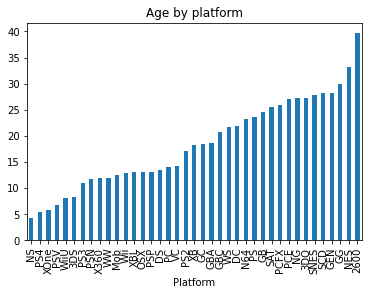

In [33]:
(2022 - platform_year_dict).sort_values().plot.bar(title='Age by platform')

Let's also convert year to int

In [34]:
games = games.astype({'Year':int})

<b> Add units to global_sales column for clarity

In [35]:
games.rename({'Global_Sales':'Global_Sales (million)'},axis=1)

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales (million)
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,Unknown,DS,505 Games,Crush Digital,2010,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007,0.00
21239,shinobido-tales-of-the-ninja,Action,Unknown,PSP,Sony Computer Entertainment,Acquire,2007,0.00
21240,tactical-ops-assault-on-terror,Shooter,Unknown,PC,Atari,Kamehan Studios,2002,0.00


In [36]:
games.isna().mean()

basename        0.0
Genre           0.0
ESRB_Rating     0.0
Platform        0.0
Publisher       0.0
Developer       0.0
Year            0.0
Global_Sales    0.0
dtype: float64

In [37]:
def clean_data(df):
    """use this to clean training/test data"""
    
    def fill_developer(row):
        """fills nan developers with the publisher"""
        if row['Developer'] is np.nan:
            row['Developer'] = row['Publisher']
        return row
    
    def fill_year(row):
        """fills nan years with average year of games on the same platform"""
        if row['Year'] != row['Year']:
            row['Year'] = platform_year_dict[row['Platform']]
        return row
    
    
    games = df[['basename','Genre','ESRB_Rating','Platform','Publisher','Developer','Year', 'Critic_Score','Global_Sales']]
    games = games[games['Global_Sales'].notna()]
    games["ESRB_Rating"] = games['ESRB_Rating'].fillna('Unknown')
    games = games.apply(fill_developer,axis=1)
    platform_year_dict = games.groupby('Platform')['Year'].mean()
    games = games.apply(fill_year, axis=1)
    games['Year'] = games['Year'].astype(int)
    games['Critic_Score'] = games['Critic_Score'].fillna(games['Critic_Score'].median())
    games.rename({'Global_Sales':'Global_Sales (million)'},axis=1, inplace= True)
    
    return games[games['Year']<2019]

# EDA

In [38]:
df = pd.read_csv("data/archive/data.csv")
games = clean_data(df)

In [39]:
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Critic_Score,Global_Sales (million)
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013,9.4,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014,9.7,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002,9.6,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013,7.4,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015,7.4,15.09


Text(0.5, 1.0, 'Game Releases by Year')

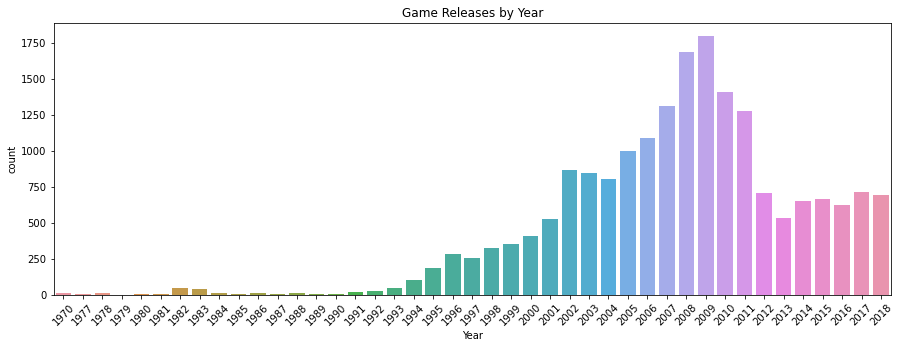

In [40]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
sns.countplot(x= 'Year', data= games)
plt.xticks(rotation = 45)
plt.title('Game Releases by Year')

In [41]:
plat = pd.DataFrame(games[['Platform']].value_counts(ascending=False))\
        .reset_index()\
        .rename(columns={0:'count'})\
        .replace({'PCFX': 'Other','GG':'SEGA','OSX':'Other','PCE':'Other',\
            'GBC':'Nintendo','WW':'Other','3DO':'Other','Mob':'Other'\
            ,'VC':'Other','SCD':'SEGA','WS':'Other','XBL':'Other','NG':'Other'\
            ,'PSN':'Sony','GEN':'Other','NES':'Nintendo','DC':'SEGA'\
            ,'GB':'Nintendo','2600':'Other','WiiU':'Nintendo','SAT':'SEGA'\
            ,'SNES':'Nintendo','NS':'Nintendo','N64':'Nintendo','GC':'Nintendo'\
            ,'XOne':'Microsoft','3DS':'Nintendo','PSV':'Sony','XB':'Microsoft'\
            ,'GBA':'Nintendo','PS4':'Sony','PS':'Sony','X360':'Microsoft'\
            ,'PSP':'Sony','PS3':'Sony','Wii':'Nintendo','PS2':'Sony','DS':'Nintendo'
        }).groupby('Platform').sum().sort_values('count', ascending = False).reset_index()
plat

,Platform,count
0,Sony,7743
1,Nintendo,6845
2,Microsoft,2695
3,PC,1635
4,SEGA,231
5,Other,208


Text(0.5, 1.0, 'Game Releases by Platform')

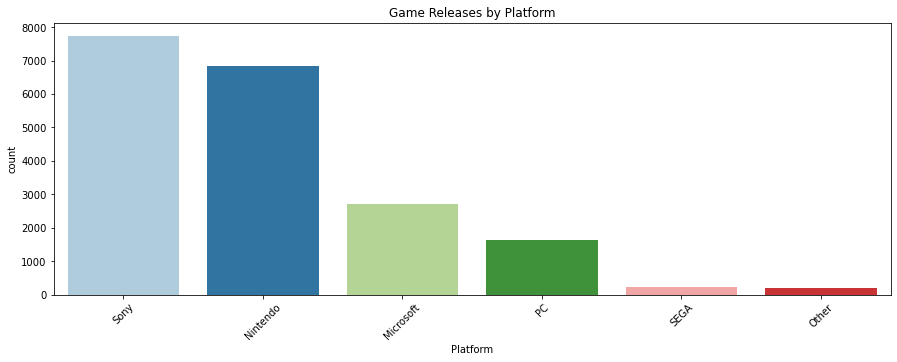

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
sns.barplot(x= 'Platform',y= 'count', data= plat,palette = "Paired")
plt.xticks(rotation = 45)
plt.title('Game Releases by Platform')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Action'),
  Text(0, 1, 'Sports'),
  Text(0, 2, 'Misc'),
  Text(0, 3, 'Adventure'),
  Text(0, 4, 'Role-Playing'),
  Text(0, 5, 'Shooter'),
  Text(0, 6, 'Racing'),
  Text(0, 7, 'Simulation'),
  Text(0, 8, 'Platform'),
  Text(0, 9, 'Fighting'),
  Text(0, 10, 'Strategy'),
  Text(0, 11, 'Puzzle'),
  Text(0, 12, 'Action-Adventure'),
  Text(0, 13, 'Music'),
  Text(0, 14, 'Visual Novel'),
  Text(0, 15, 'MMO'),
  Text(0, 16, 'Party'),
  Text(0, 17, 'Board Game'),
  Text(0, 18, 'Sandbox'),
  Text(0, 19, 'Education')])

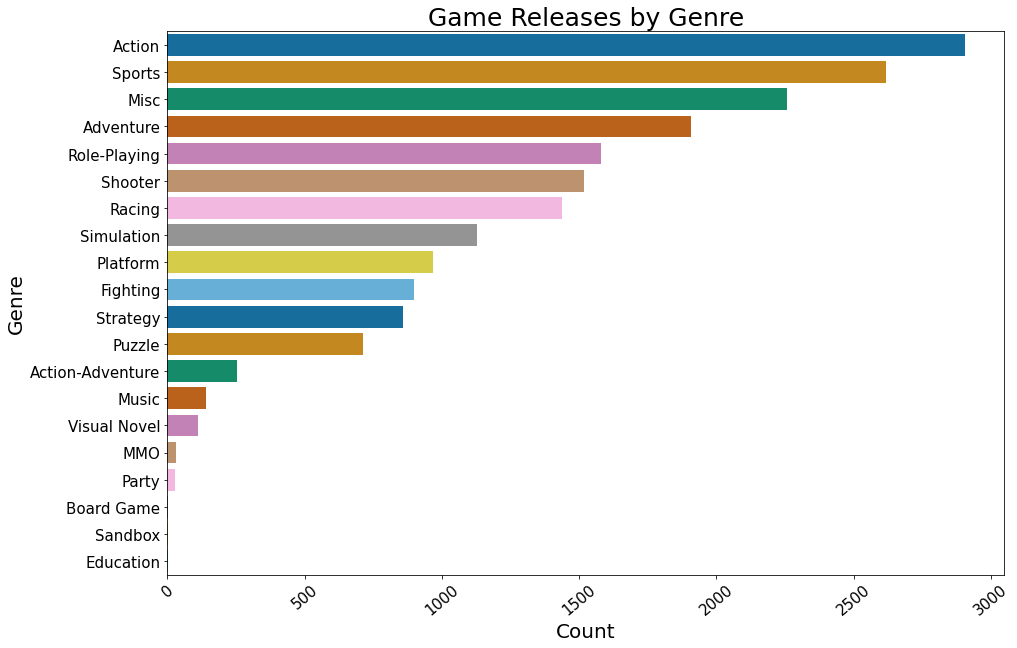

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))

df = games[['Genre','Year']].groupby('Genre').count().reset_index().sort_values('Year', ascending= False).rename(columns={'Year':'Count'})
sns.barplot(x= 'Count', y= 'Genre', data=df,palette = "colorblind", orient='h')
plt.xticks(rotation = 40)
plt.title('Game Releases by Genre', fontsize = 25)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

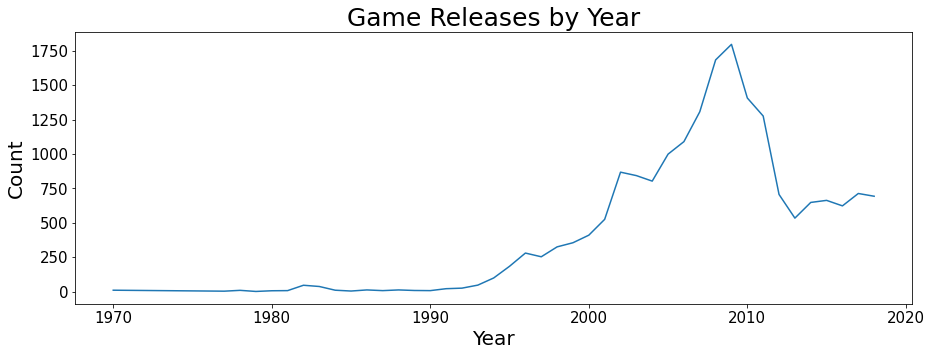

In [44]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
year = pd.DataFrame(games['Year'].value_counts().reset_index().rename(columns={'index':'Year','Year':'Count'})).sort_values('Year')
sns.lineplot(x='Year', y= 'Count', data = year)
plt.title('Game Releases by Year', fontsize = 25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

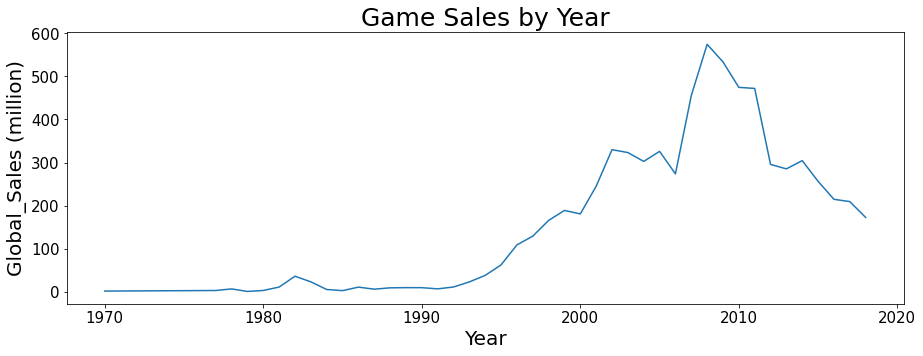

In [45]:
fig, axes = plt.subplots(1, 1, figsize=(15,5))
sale = pd.DataFrame(games[['Year','Global_Sales (million)']]).groupby('Year').sum().reset_index()
sns.lineplot(x='Year', y= 'Global_Sales (million)', data = sale)
plt.title('Game Sales by Year', fontsize = 25)
plt.ylabel('Global_Sales (million)', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, 'GBC'),
  Text(0, 1, 'NES'),
  Text(0, 2, 'GEN'),
  Text(0, 3, '2600'),
  Text(0, 4, 'X360'),
  Text(0, 5, 'PS3'),
  Text(0, 6, 'PS4'),
  Text(0, 7, 'PS'),
  Text(0, 8, 'XOne'),
  Text(0, 9, 'PS2'),
  Text(0, 10, 'GB'),
  Text(0, 11, 'Wii'),
  Text(0, 12, 'N64'),
  Text(0, 13, 'SNES'),
  Text(0, 14, 'SCD'),
  Text(0, 15, 'XB'),
  Text(0, 16, 'DC'),
  Text(0, 17, 'GBA'),
  Text(0, 18, 'WiiU'),
  Text(0, 19, 'PSN'),
  Text(0, 20, 'GC'),
  Text(0, 21, 'WS'),
  Text(0, 22, '3DS'),
  Text(0, 23, 'DS'),
  Text(0, 24, 'SAT'),
  Text(0, 25, 'PSP'),
  Text(0, 26, 'NS'),
  Text(0, 27, 'PC'),
  Text(0, 28, 'NG'),
  Text(0, 29, 'PSV'),
  Text(0, 30, 'WW'),
  Text(0, 31, 'PCE'),
  Text(0, 32, 'VC'),
  Text(0, 33, '3DO'),
  Text(0, 34, 'GG'),
  Text(0, 35, 'OSX'),
  Text(0, 36, 'PCFX'),
  Text(0, 37, 'XBL'),

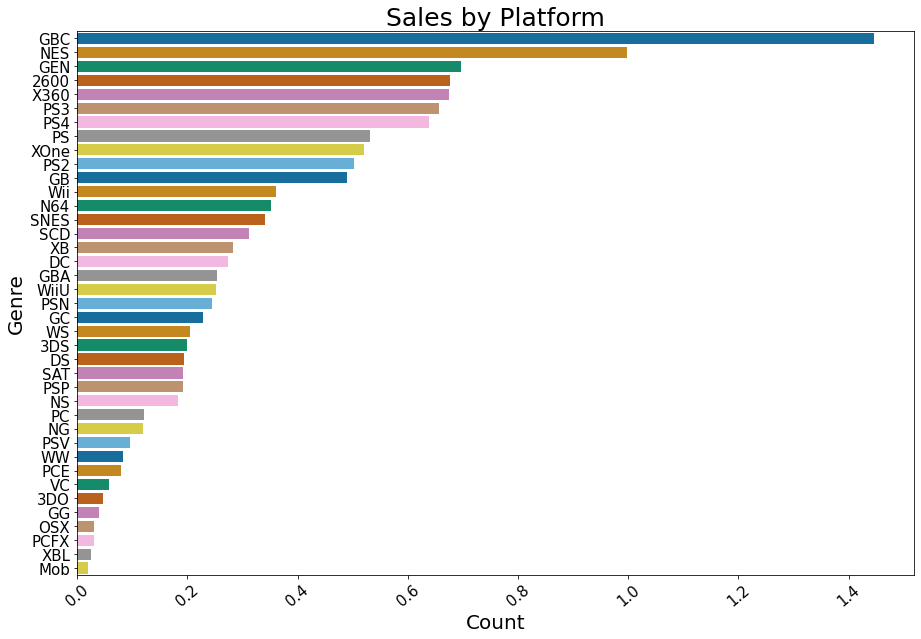

In [46]:
fig, axes = plt.subplots(1, 1, figsize=(15,10))

df = games[['Platform',"Global_Sales (million)"]].groupby('Platform').mean().reset_index().sort_values("Global_Sales (million)", ascending= False).rename(columns={"Global_Sales (million)":'Count'})
sns.barplot(x= 'Count', y= 'Platform', data=df,palette = "colorblind", orient='h')
plt.xticks(rotation = 40)
plt.title('Sales by Platform', fontsize = 25)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Genre', fontsize=20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [47]:
games[games['Platform'] == 'NES']

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Critic_Score,Global_Sales (million)
344,teenage-mutant-ninja-turtles,Platform,Unknown,NES,Ultra Games,Konami,1989,5.9,4.17
866,teenage-mutant-ninja-turtles-ii-the-arcade-game,Action,Unknown,NES,Ultra Games,Konami,1990,7.4,2.23
881,rbi-baseball,Sports,Unknown,NES,Tengen,Namco,1988,7.4,2.20
978,famista-89-kaimaku-han,Sports,Unknown,NES,Namco,Namco,1989,7.4,2.05
1443,xevious,Shooter,Unknown,NES,Namco,Namco,1990,7.4,1.52
1480,ninja-hattori-kun-ninja-wa-shuugyou-degogiru-n...,Platform,Unknown,NES,Hudson Soft,Hudson Soft,1986,7.4,1.50
1589,rbi-baseball-2,Sports,Unknown,NES,Tengen,Namco,1990,7.4,1.42
1637,teenage-mutant-ninja-turtles-iii-the-manhattan...,Action,Unknown,NES,Konami,Konami,1992,7.4,1.39
1677,gradius,Shooter,Unknown,NES,Konami,Konami,1986,7.4,1.36
1850,dragon-ball-daimaou-fukkatsu,Role-Playing,Unknown,NES,Bandai,TOSE,1988,7.4,1.25


# Feature Engineering/ Model


In [48]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [49]:
def group_sparse_developers(df):
    def replace_sparse_developer(developer):
        if developer in sparse_developers:
            return 'Other'
        else:
            return developer
    
    sparse_developers = df['Developer'].value_counts()[df['Developer'].value_counts() < 4].index
    df['Developer'] = df['Developer'].apply(replace_sparse_developer)
    return df

def group_sparse_publishers(df):
    def replace_sparse_publisher(publisher):
        if publisher in sparse_publisher:
            return 'Other'
        else:
            return publisher
    
    sparse_publisher = df['Publisher'].value_counts()[df['Publisher'].value_counts() < 4].index
    df['Publisher'] = df['Publisher'].apply(replace_sparse_publisher)
    return df


In [50]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19357 entries, 19 to 21241
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   basename                19357 non-null  object 
 1   Genre                   19357 non-null  object 
 2   ESRB_Rating             19357 non-null  object 
 3   Platform                19357 non-null  object 
 4   Publisher               19357 non-null  object 
 5   Developer               19357 non-null  object 
 6   Year                    19357 non-null  int64  
 7   Critic_Score            19357 non-null  float64
 8   Global_Sales (million)  19357 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.1+ MB


In [51]:
X = games.drop(columns= ['basename','Global_Sales (million)'])
y = games['Global_Sales (million)']
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=42)

In [52]:
X_train = group_sparse_developers(X_train)
X_train = group_sparse_publishers(X_train)

X_test =group_sparse_developers(X_test)
X_test =group_sparse_publishers(X_test)

#### Regression

In [53]:
developer_trans = FunctionTransformer(group_sparse_developers) #transformer for grouping sparse developers
publisher_trans = FunctionTransformer(group_sparse_publishers) #transformer for grouping sparse publishers

kbin = KBinsDiscretizer(n_bins=12, encode='onehot', strategy='quantile') #creates 12 bins for year column

ohe_cols = ['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer']
ohe = OneHotEncoder(handle_unknown='ignore') #one hot encoder

ct = ColumnTransformer([
                        # ("developer", developer_trans,['Developer']),
                        # ("publisher", publisher_trans,['Publisher']),
                        ("kbin", kbin,['Year']),
                        ("ohe", ohe, ohe_cols)],
                        remainder='passthrough')
# this pipelines firsts groups the sparse values in developer and publisher columns, and then proceeds 
# with the other transformations (binning and one hot encoding)
pipe = Pipeline(steps=[('ct', ct),("model",LinearRegression())])
mdl = pipe.fit(X_train, y_train)

In [54]:
y_pred = mdl.predict(X_test)
print("RMSE: ",mean_squared_error(y_pred, y_test,squared= False))# rmse
print("R^2: ",mdl.score(X_test, y_test))

RMSE:  0.7296718246543715
R^2:  0.28132885226541715


#### Random Forest Regressor

In [55]:
developer_trans = FunctionTransformer(group_sparse_developers) #transformer for grouping sparse developers
publisher_trans = FunctionTransformer(group_sparse_publishers) #transformer for grouping sparse publishers

kbin = KBinsDiscretizer(n_bins=12, encode='onehot', strategy='quantile') #creates 12 bins for year column

ohe_cols = ['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer']
ohe = OneHotEncoder(handle_unknown='ignore') #one hot encoder

ct = ColumnTransformer([("kbin", kbin,['Year']),
                        ("ohe", ohe, ohe_cols)],
                        remainder='passthrough')
# this pipelines firsts groups the sparse values in developer and publisher columns, and then proceeds 
# with the other transformations (binning and one hot encoding)
pipe = Pipeline(steps=[('ct', ct),("model",RandomForestRegressor(n_jobs=-1))])
parameters={
            "model__max_depth" : [5,7,9,11],
           "model__min_samples_leaf":[4,6,8,10],
           "model__min_weight_fraction_leaf":[0.2,0.3,0.4,0.5],
           "model__max_leaf_nodes":[10,20,30,40]}
grid = GridSearchCV(pipe, param_grid= parameters,cv= 10)
mdl = grid.fit(X_train, y_train)

In [56]:
y_pred = mdl.predict(X_test)
print("RMSE: ",mean_squared_error(y_pred, y_test,squared= False))# rmse
print("R^2: ",mdl.score(X_test, y_test))

RMSE:  0.8468844684033245
R^2:  0.03189292887964157


#### Gradient Boosting Regressor 

In [57]:
developer_trans = FunctionTransformer(group_sparse_developers) #transformer for grouping sparse developers
publisher_trans = FunctionTransformer(group_sparse_publishers) #transformer for grouping sparse publishers

kbin = KBinsDiscretizer(n_bins=12, encode='onehot', strategy='quantile') #creates 12 bins for year column

ohe_cols = ['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer']
ohe = OneHotEncoder(handle_unknown='ignore') #one hot encoder

ct = ColumnTransformer([("kbin", kbin,['Year']),
                        ("ohe", ohe, ohe_cols)],
                        remainder='passthrough')
# this pipelines firsts groups the sparse values in developer and publisher columns, and then proceeds 
# with the other transformations (binning and one hot encoding)
pipe = Pipeline(steps=[('ct', ct),("model",GradientBoostingRegressor())])
parameters={
            "model__learning_rate": [0.01,0.05,0.1],
            "model__n_estimators":[50,100],
            "model__max_depth" : [7,9,11],
           "model__min_samples_leaf":[4,6,8],
           "model__min_weight_fraction_leaf":[0.2,0.3],
           "model__max_leaf_nodes":[10,20]
           }
grid = GridSearchCV(pipe, param_grid= parameters,cv= 10)
mdl = grid.fit(X_train, y_train)

In [58]:
y_pred = mdl.predict(X_test)
print("RMSE: ",mean_squared_error(y_pred, y_test,squared= False))# rmse
print("R^2: ",mdl.score(X_test, y_test))

RMSE:  0.8469710276550309
R^2:  0.03169502017009995


#### K Nearest Neighbor Regressor

In [59]:
developer_trans = FunctionTransformer(group_sparse_developers) #transformer for grouping sparse developers
publisher_trans = FunctionTransformer(group_sparse_publishers) #transformer for grouping sparse publishers

kbin = KBinsDiscretizer(n_bins=12, encode='onehot', strategy='quantile') #creates 12 bins for year column

ohe_cols = ['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Developer']
ohe = OneHotEncoder(handle_unknown='ignore') #one hot encoder

ct = ColumnTransformer([("kbin", kbin,['Year']),
                        ("ohe", ohe, ohe_cols)],
                        remainder='passthrough')
# this pipelines firsts groups the sparse values in developer and publisher columns, and then proceeds 
# with the other transformations (binning and one hot encoding)
pipe = Pipeline(steps=[('ct', ct),("model",KNeighborsRegressor(n_jobs=-1))])
parameters={
    'model__n_neighbors': [5,6,7,8,9,10],
    'model__weights':['uniform','distance']
}
grid = GridSearchCV(pipe, param_grid= parameters,cv= 10)
mdl = grid.fit(X_train, y_train)

In [60]:
y_pred = mdl.predict(X_test)
print("RMSE: ",mean_squared_error(y_pred, y_test,squared= False))# rmse
print("R^2: ",mdl.score(X_test, y_test))

RMSE:  0.6980822344765787
R^2:  0.3422085449187665
